<a href="https://colab.research.google.com/github/TaniaHafsa/my-github-repo/blob/main/Brain_Stroke_Prediction(Hafsa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploratory Data Analysis(EDA)

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in data into a dataframe
data = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')

# Display top of dataframe
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#checking for total null values
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

If we see any feature unrelated to label, we can just drop them before starting to EDA and preprocessing

In [ ]:
data = data.drop(["ever_married", "work_type", "Residence_type"], axis =1)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


## How many of the people in the data had a stroke before? Check the label

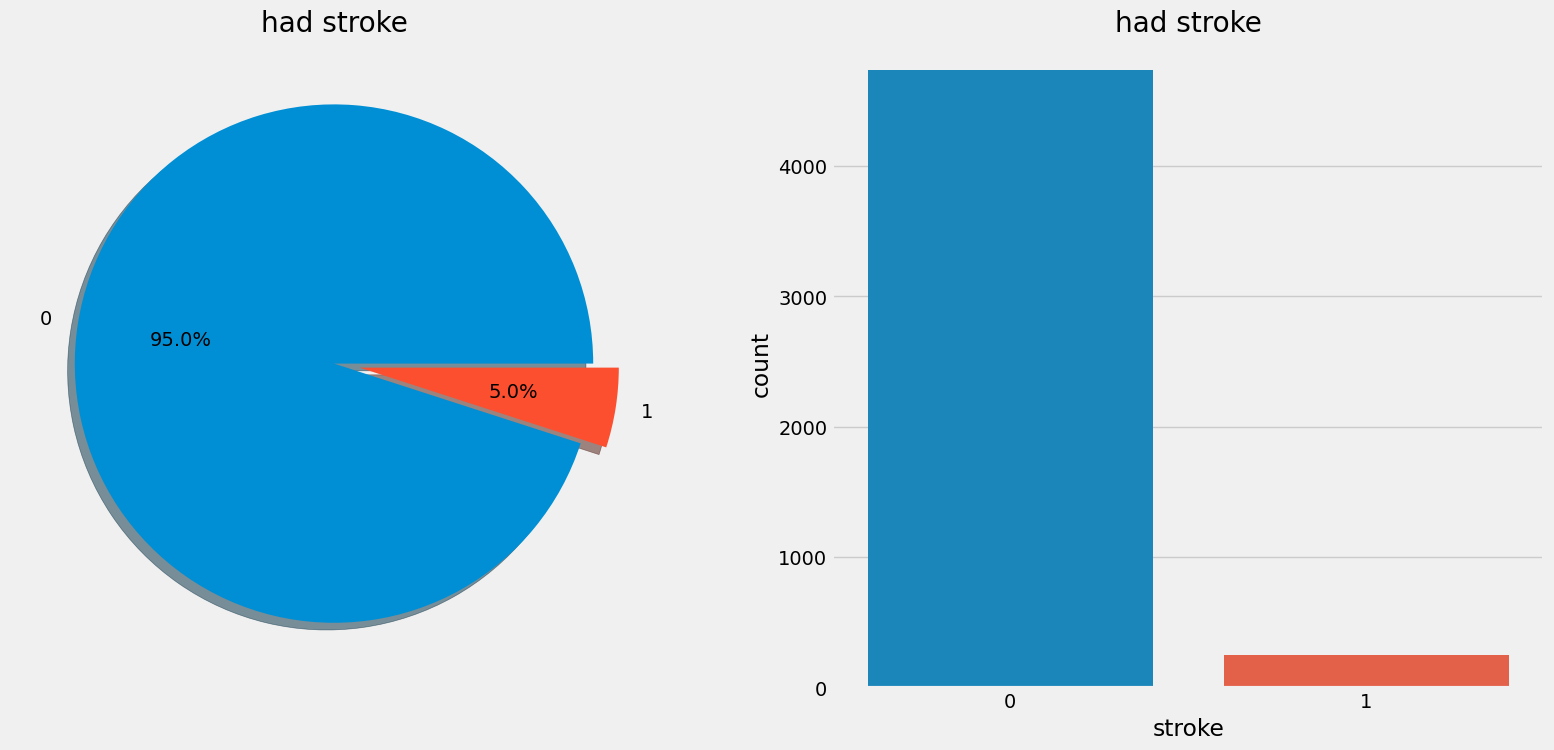

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('had stroke')
ax[0].set_ylabel('')
sns.countplot(x='stroke',data=data,ax=ax[1])
ax[1].set_title('had stroke')
plt.show()

## Categorical Feature : Gender

In [ ]:
data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

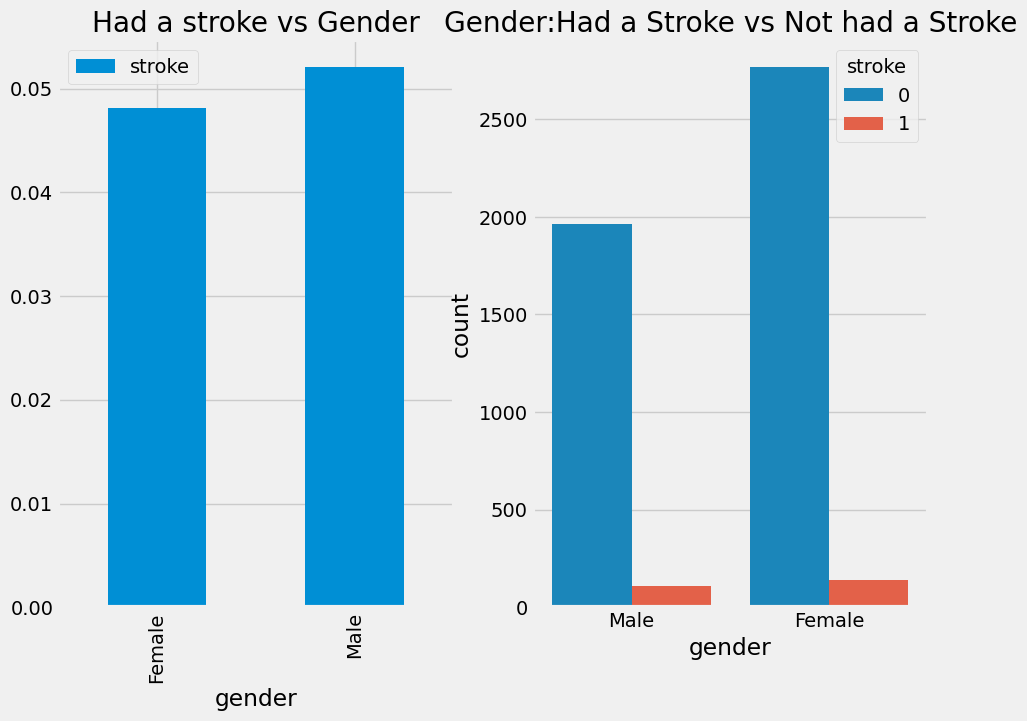

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Gender')
sns.countplot(x='gender',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Gender:Had a Stroke vs Not had a Stroke')
plt.show()

## Categorical Feature: Hypertansion

In [ ]:
data.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

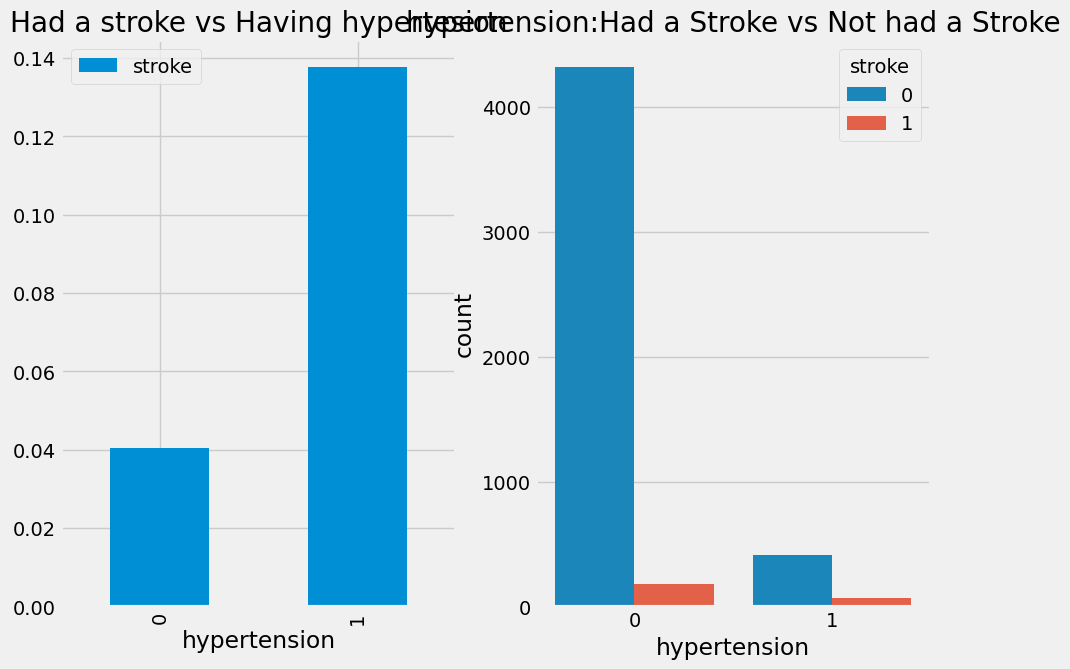

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['hypertension','stroke']].groupby(['hypertension']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Having hypertesion')
sns.countplot(x='hypertension',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('hypertension:Had a Stroke vs Not had a Stroke')
plt.show()

## Categorical Feature : Heart Disease

In [ ]:
data.groupby(['heart_disease','stroke'])['stroke'].count()

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: stroke, dtype: int64

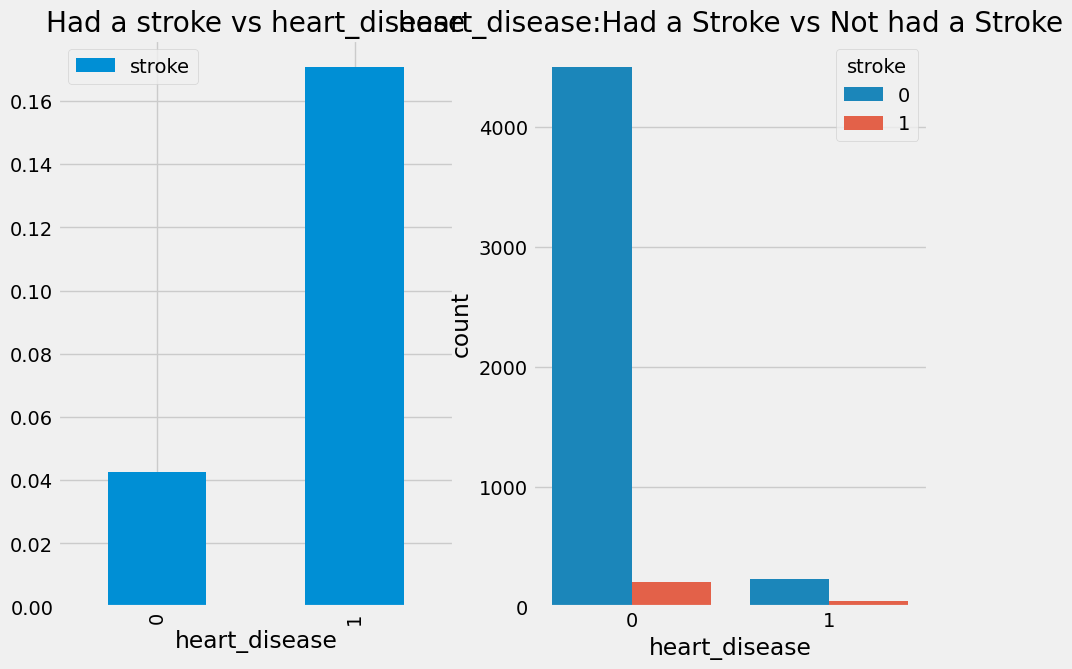

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['heart_disease','stroke']].groupby(['heart_disease']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs heart_disease')
sns.countplot(x='heart_disease',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('heart_disease:Had a Stroke vs Not had a Stroke')
plt.show()

## Ordinal Feature : Smoking Status

In [ ]:
pd.crosstab(data.smoking_status,data.stroke,margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
smoking_status,,,
Unknown,1453,47,1500
formerly smoked,797,70,867
never smoked,1749,89,1838
smokes,734,42,776
All,4733,248,4981


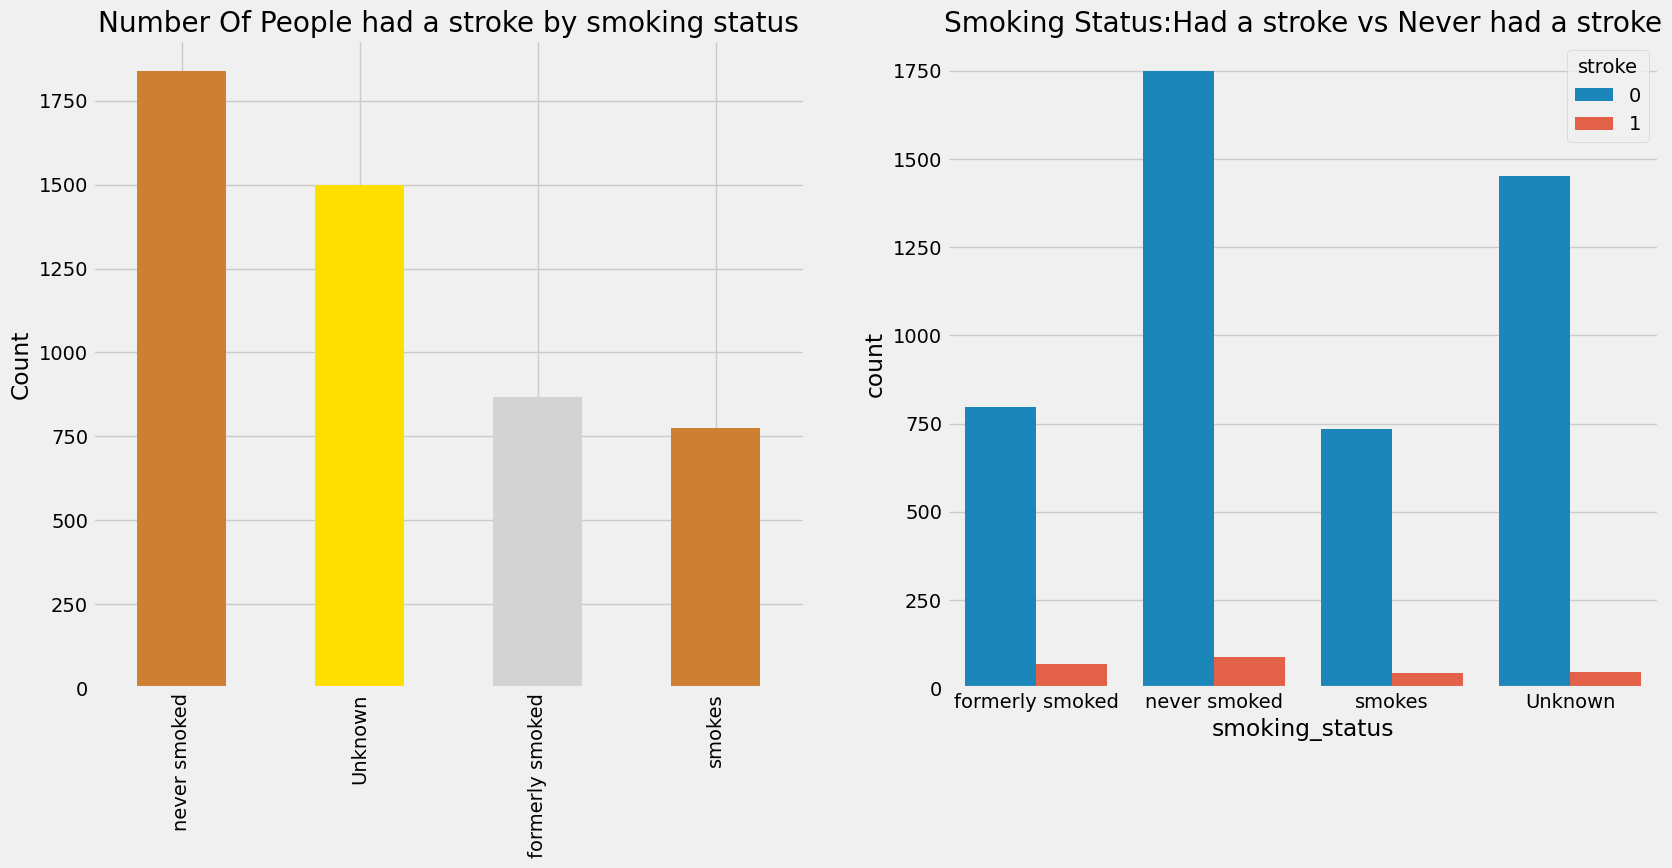

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['smoking_status'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People had a stroke by smoking status')
ax[0].set_ylabel('Count')
sns.countplot(x='smoking_status',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Smoking Status:Had a stroke vs Never had a stroke')
plt.show()

## Let's also check the relationship between the gender and smoking status on stroke

In [ ]:
pd.crosstab([data.gender,data.stroke],data.smoking_status,margins=True).style.background_gradient(cmap='summer_r')

<Figure size 1500x800 with 0 Axes>

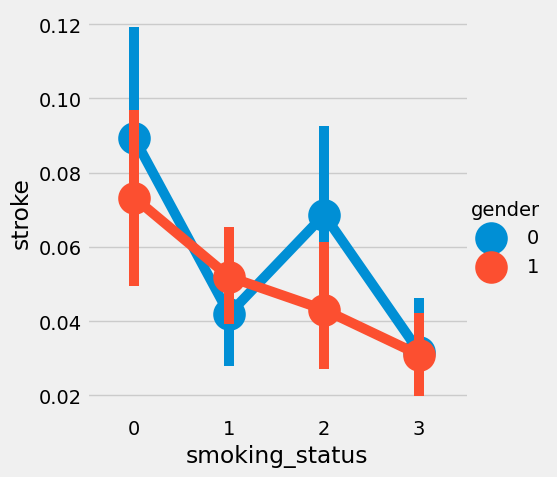

In [ ]:
plt.figure(figsize = (15,8))
sns.catplot(x='smoking_status',y='stroke',hue='gender',data=data,kind="point")
plt.show()

## Continous Feature: Age

In [ ]:
# See the min, max, mean values
print('Oldest Person was of:',data['age'].max(),'Years')
print('Youngest Person was of:',data['age'].min(),'Years')
print('Average Age in the data:',data['age'].mean(),'Years')

Oldest Person was of: 82.0 Years
Youngest Person was of: 0.08 Years
Average Age in the data: 43.41985946597069 Years


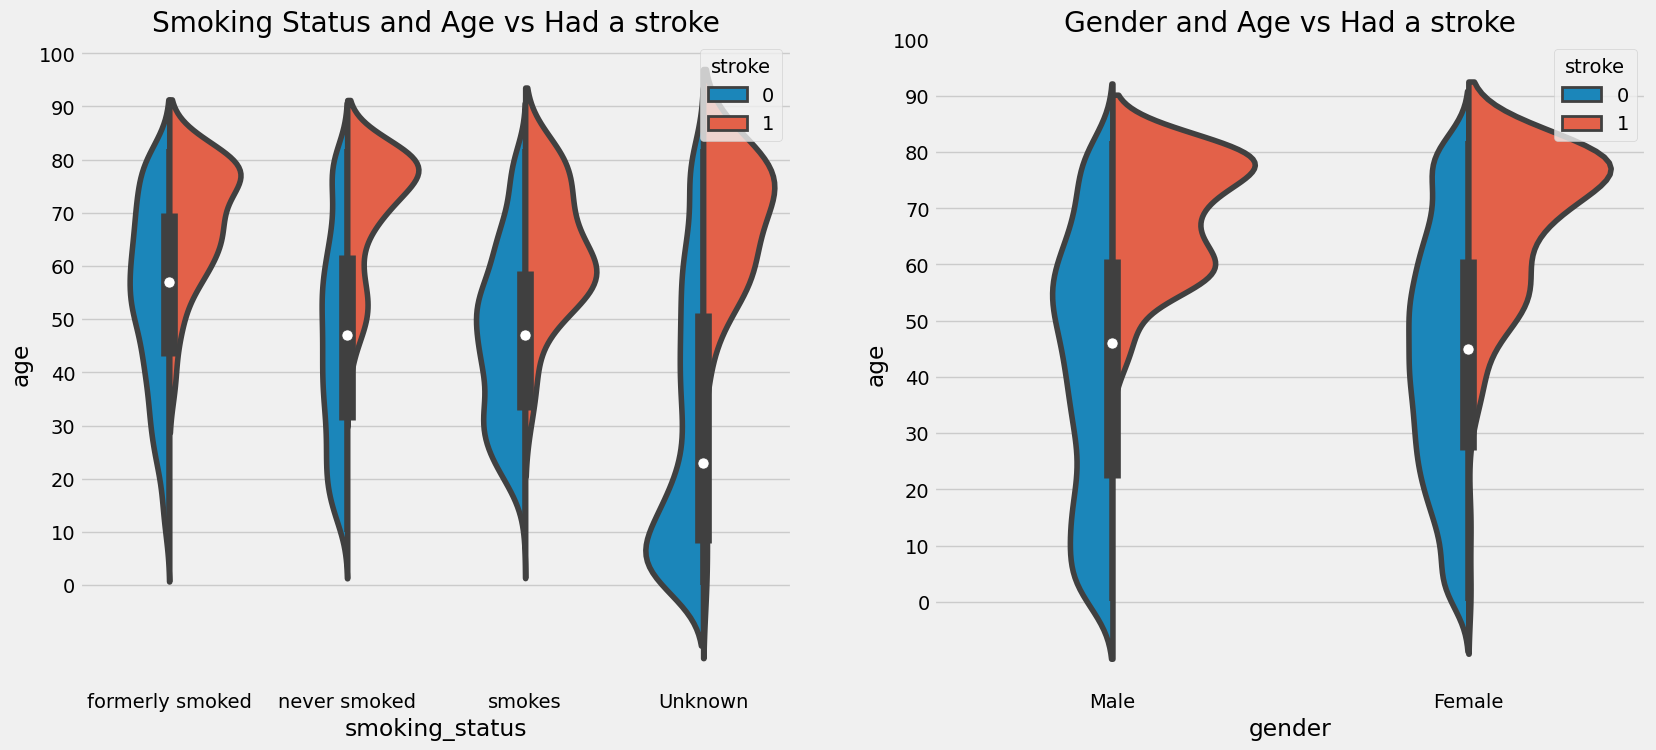

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="smoking_status",y="age", hue="stroke", data=data,split=True,ax=ax[0])
ax[0].set_title('Smoking Status and Age vs Had a stroke')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="gender",y="age", hue="stroke", data=data,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Had a stroke')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Continious Features: Average Glucose Level and BMI (Body Mass Index)

In [ ]:
print('Maximum "Average Glucose Level" in data:',data['avg_glucose_level'].max())
print('Minimum "Average Glucose Level" in data:',data['avg_glucose_level'].min())
print('Average "Average Glucose Level" in data:',data['avg_glucose_level'].mean())
print("***************************************")
print('Maximum "BMI" in data:',data['bmi'].max())
print('Minimum "BMI" in data:',data['bmi'].min())
print('Average "BMI" in data:',data['bmi'].mean())


Maximum "Average Glucose Level" in data: 271.74
Minimum "Average Glucose Level" in data: 55.12
Average "Average Glucose Level" in data: 105.94356153382854
***************************************
Maximum "BMI" in data: 48.9
Minimum "BMI" in data: 14.0
Average "BMI" in data: 28.498173057618956


## Lets see the density of smoke status on the average glucose level in graphs

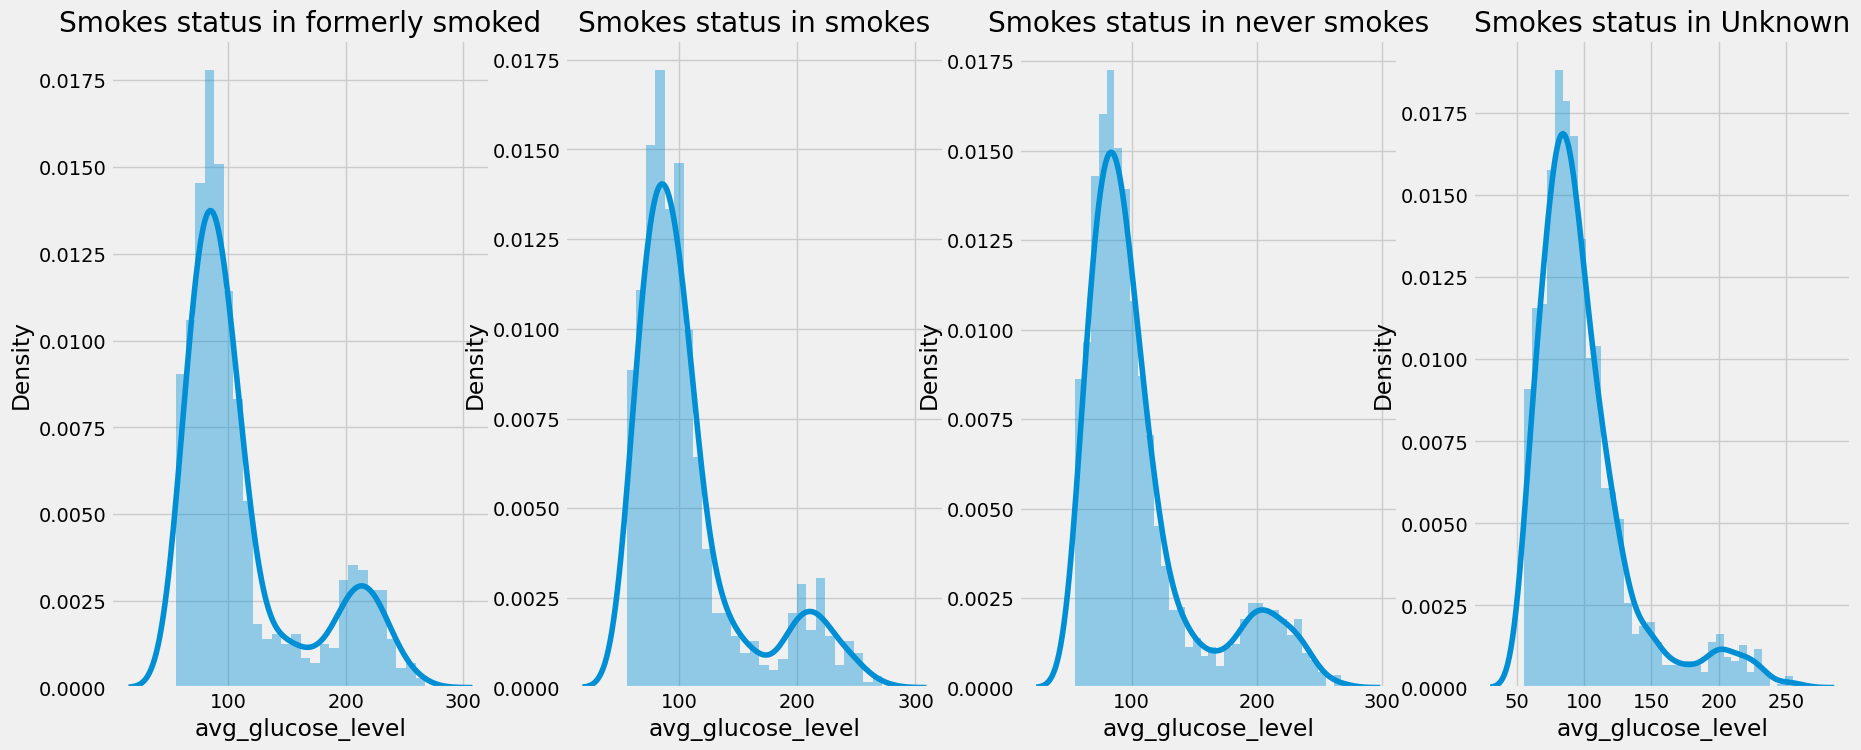

In [ ]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(data[data['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(data[data['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(data[data['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(data[data['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()

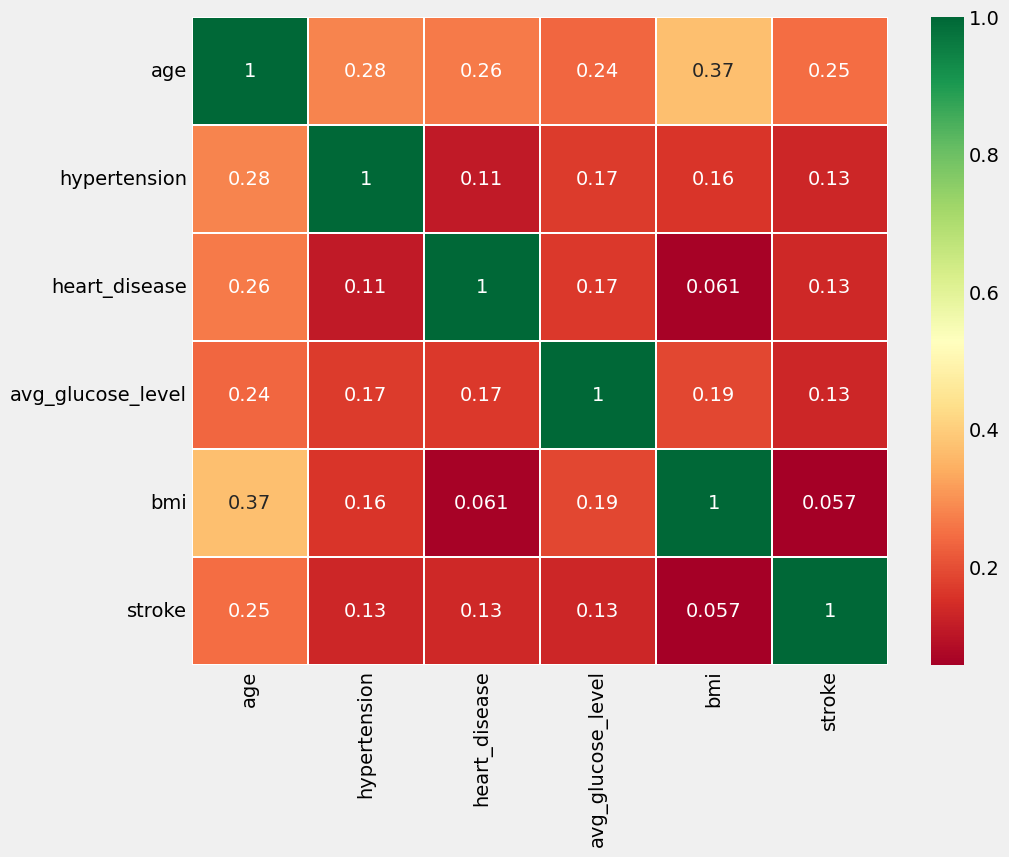

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 2. Feature Engineering and Data Cleaning

In [ ]:
data.insert(2,'age_band', np.zeros)

In [ ]:
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4
data.drop(columns= "age", inplace=True)
data["age_band"]=data['age_band'].astype(str).astype(int)
data.head()

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,228.69,36.6,formerly smoked,1
1,Male,4,0,1,105.92,32.5,never smoked,1
2,Female,3,0,0,171.23,34.4,smokes,1
3,Female,4,1,0,174.12,24.0,never smoked,1
4,Male,4,0,0,186.21,29.0,formerly smoked,1


In [ ]:
#checking the number of people in each band
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,age_band
3,1229
2,1067
4,1020
1,895
0,770


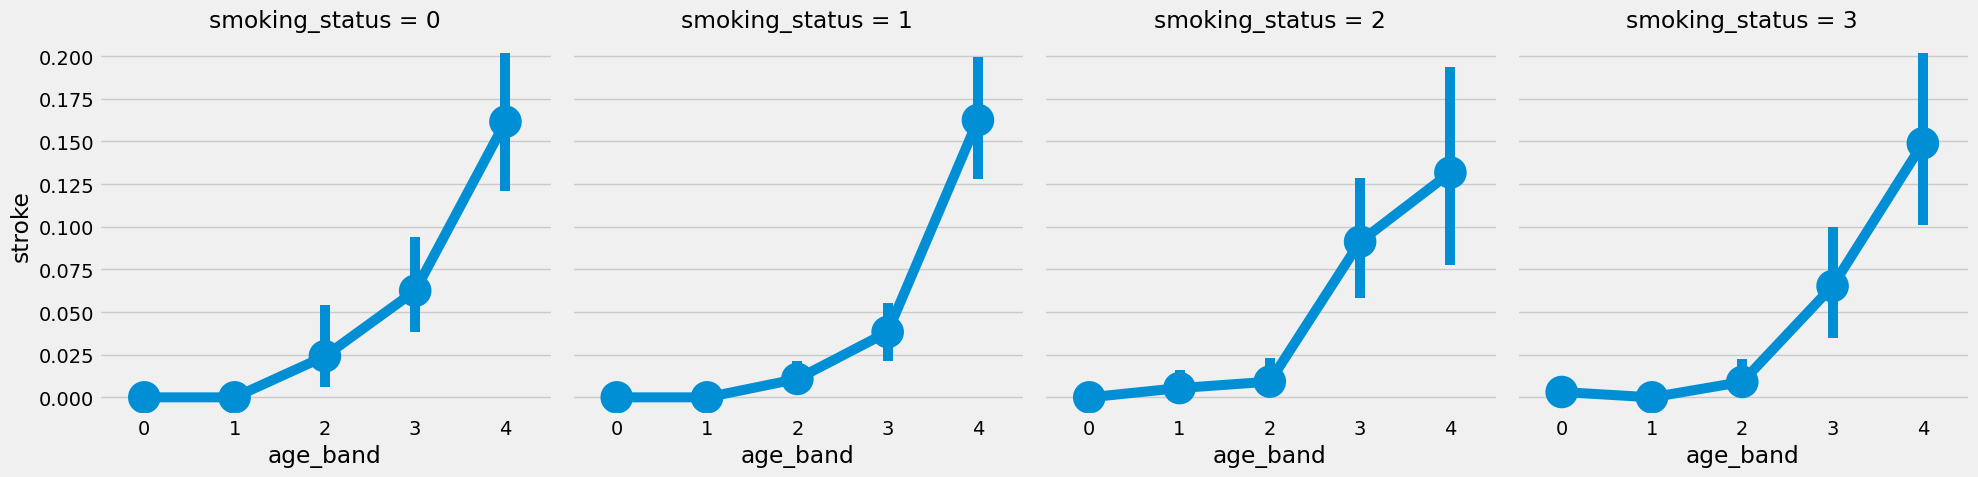

In [ ]:
sns.catplot(x='age_band',y='stroke',data=data,col='smoking_status',kind="point")
plt.show()

In [ ]:
# copy the data
data = data.copy()

# apply normalization techniques on Columns
column = 'avg_glucose_level'
column2 = 'bmi'
data[column] = data[column] /data[column].abs().max()
data[column2] = data[column2] /data[column2].abs().max()

# view normalized data
display(data[column], data[column2])

0       0.841577
1       0.389784
2       0.630124
3       0.640760
4       0.685251
          ...   
4976    0.258151
4977    0.703430
4978    0.349672
4979    0.308898
4980    0.308199
Name: avg_glucose_level, Length: 4981, dtype: float64

0       0.748466
1       0.664622
2       0.703476
3       0.490798
4       0.593047
          ...   
4976    0.609407
4977    0.635992
4978    0.650307
4979    0.613497
4980    0.595092
Name: bmi, Length: 4981, dtype: float64

## We also need to conver string variables to numeric variables. So, we need to work on smoking_status and gender too.

In [ ]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [ ]:
# What was the smoking status variables
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
data['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

# 3. Predictive Modelling

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

## Splitting the data into test and train sets

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['stroke'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data["stroke"]
len(train_X), len(train_Y), len(test_X), len(test_Y)

(3486, 3486, 1495, 1495)

In [ ]:
print(train_X)

      gender  age_band  hypertension  heart_disease  avg_glucose_level  \
4103       0         4             0              0           0.316405   
1999       1         0             0              0           0.303194   
1074       1         4             0              0           0.250092   
1264       1         3             0              0           0.325348   
2914       1         3             0              0           0.329690   
...      ...       ...           ...            ...                ...   
1522       1         3             0              1           0.765622   
2808       1         0             0              0           0.301465   
4547       1         0             0              0           0.270406   
4593       1         2             0              0           0.254140   
1512       1         2             0              0           0.378634   

           bmi  smoking_status  
4103  0.572597               3  
1999  0.349693               1  
1074  0.5480

In [ ]:
print(train_Y)

      stroke
4103       0
1999       0
1074       0
1264       0
2914       0
...      ...
1522       0
2808       0
4547       0
4593       0
1512       0

[3486 rows x 1 columns]


## Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9505016722408027


## Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.9505016722408027


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9505016722408027


## Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9103678929765886


## K-Nearest Neighbours(KNN)

In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.9444816053511705


## Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.862876254180602


## Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.9444816053511705


## Cross Validation

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.950285,0.124694
Radial Svm,0.950285,0.124694
Logistic Regression,0.950285,0.124694
KNN,0.949080,0.124239
Decision Tree,0.904099,0.108317
Naive Bayes,0.859911,0.078227
Random Forest,0.943056,0.121987


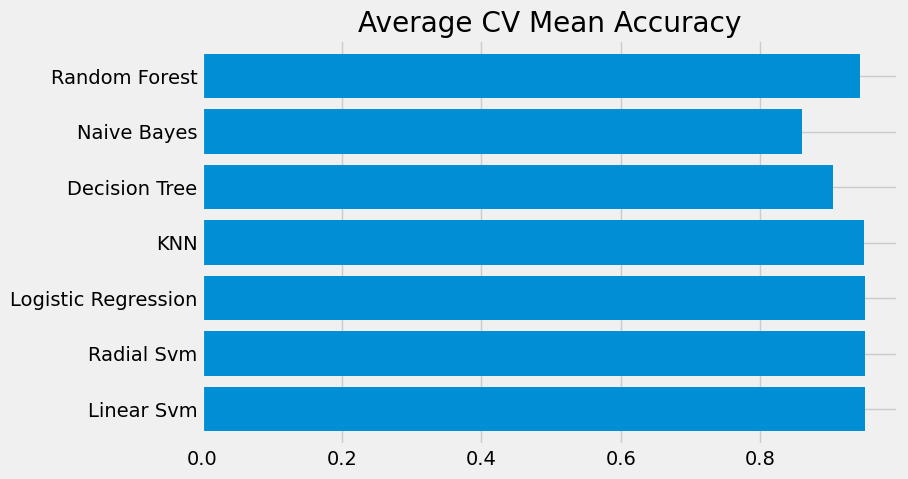

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Great, Lets see the confusion matrixes for each algorithm

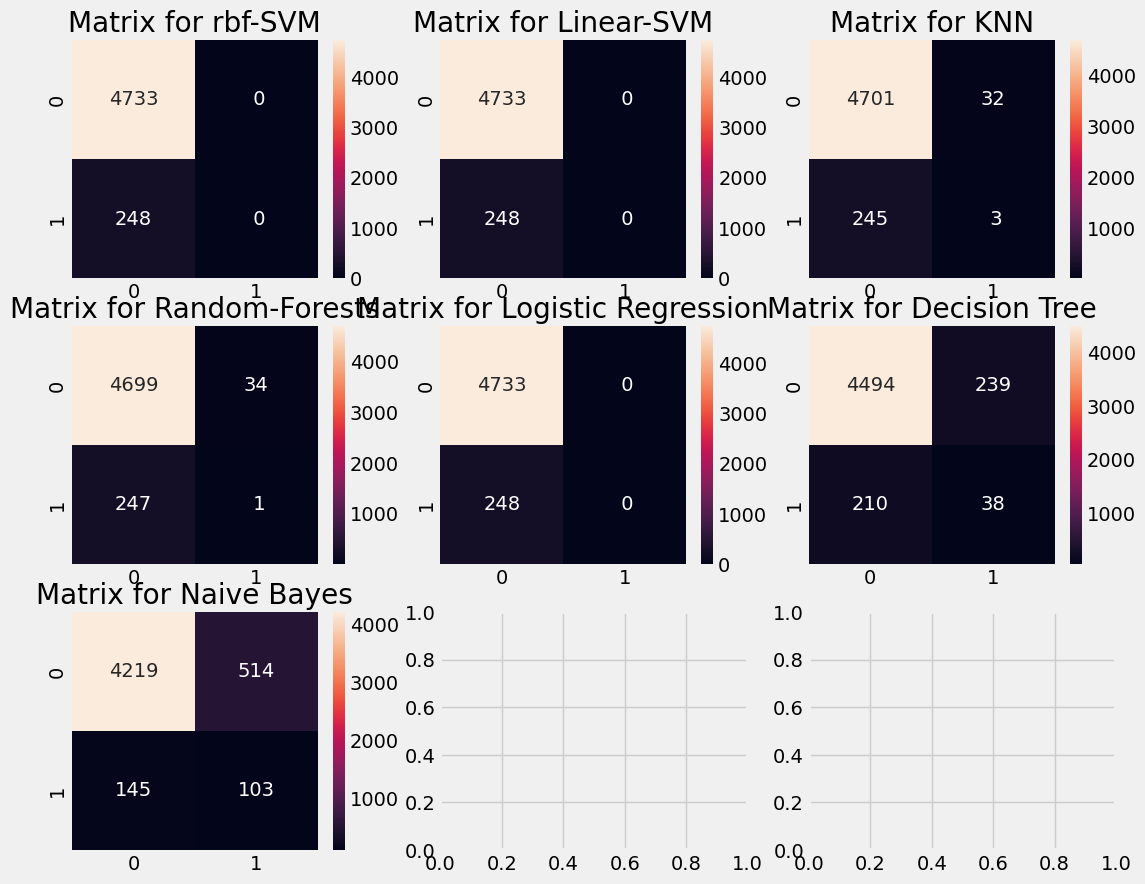

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## Ensembling

Ensembling is a great method to increase the performance of a model. Actually, It is the combination of several simple models to create a single powerful model. We already got the 95% accuracy for some models but it is just to see the ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is :',cross.mean())

The accuracy for ensembled model is: 0.9505016722408027
The cross validated score is : 0.9500100602812049


## Boosting

It is also an ensembling technique that we will be applying some boosting algorithms like Ada, Gradient and XGBoost in this section

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.9502108634940564


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.9423799406040997


In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,random_state=0, learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.9379634771551133
